In [3]:
import numpy as np
import random


class GeneticAlgorithmTSP:
    def __init__(self, cities, population_size, generations):
        self.num_cities = len(cities)
        self.population_size = population_size
        self.generations = generations
        self.cities = []
        self.population = []
        self.fitness_values = []
        self.best_solution = None
        self.best_fitness = float('inf')

    def initialize(self):
        self.cities = cities
        self.population = []
        self.fitness_values = []

        for _ in range(self.population_size):
            individual = list(range(self.num_cities))
            random.shuffle(individual)
            self.population.append(individual)
            self.fitness_values.append(self.calculate_fitness(individual))

    def calculate_fitness(self, individual):
        distance = 0
        for i in range(self.num_cities - 1):
            current_city = individual[i]
            next_city = individual[i + 1]
            distance += np.linalg.norm(
                self.cities[current_city] - self.cities[next_city])

        # Add distance from the last city back to the starting city
        distance += np.linalg.norm(self.cities[individual[-1]
                                               ] - self.cities[individual[0]])

        return distance

    def crossover(self, parent1, parent2):
        child = [-1] * self.num_cities
        start_index = random.randint(0, self.num_cities - 1)
        end_index = random.randint(0, self.num_cities - 1)

        if start_index < end_index:
            for i in range(start_index, end_index + 1):
                child[i] = parent1[i]

        for i in range(self.num_cities):
            if parent2[i] not in child:
                for j in range(self.num_cities):
                    if child[j] == -1:
                        child[j] = parent2[i]
                        break

        return child

    def mutate(self, individual, mutation_rate):
        for i in range(self.num_cities):
            if random.random() < mutation_rate:
                swap_index = random.randint(0, self.num_cities - 1)
                individual[i], individual[swap_index] = individual[swap_index], individual[i]

    def evolve(self, mutation_rate):
        new_population = []
        new_fitness_values = []

        # Keep the best solution from the previous generation
        min_fitness_index = self.fitness_values.index(min(self.fitness_values))
        new_population.append(self.population[min_fitness_index])
        new_fitness_values.append(self.fitness_values[min_fitness_index])

        while len(new_population) < self.population_size:
            parent1 = self.selection()
            parent2 = self.selection()
            child = self.crossover(parent1, parent2)
            self.mutate(child, mutation_rate)
            new_population.append(child)
            new_fitness_values.append(self.calculate_fitness(child))

        self.population = new_population
        self.fitness_values = new_fitness_values

    def selection(self):
        tournament_size = 3
        tournament_candidates = random.sample(
            range(self.population_size), tournament_size)
        tournament_fitness_values = [self.fitness_values[i]
                                     for i in tournament_candidates]
        min_fitness_index = tournament_candidates[tournament_fitness_values.index(
            min(tournament_fitness_values))]
        return self.population[min_fitness_index]

    def run(self):
        self.initialize()

        for generation in range(self.generations):
            if min(self.fitness_values) < self.best_fitness:
                best_solution_index = self.fitness_values.index(
                    min(self.fitness_values))
                self.best_solution = self.population[best_solution_index]
                self.best_fitness = self.fitness_values[best_solution_index]

            print(
                f"Generation {generation + 1}: Best Distance = {self.best_fitness}")

            mutation_rate = 1.0 - generation / self.generations
            self.evolve(mutation_rate)

        print("\nOptimal Solution:")
        print(f"Best Distance: {self.best_fitness}")
        print(f"Best Path: {self.best_solution}")


# Example usage
cities = np.random.rand(50, 2)
population_size = 100
generations = 10000

tsp = GeneticAlgorithmTSP(cities, population_size, generations)
tsp.run()

Generation 1: Best Distance = 21.783675544442243
Generation 2: Best Distance = 21.783675544442243
Generation 3: Best Distance = 21.686710206194185
Generation 4: Best Distance = 21.686710206194185
Generation 5: Best Distance = 21.686710206194185
Generation 6: Best Distance = 21.686710206194185
Generation 7: Best Distance = 21.686710206194185
Generation 8: Best Distance = 21.686710206194185
Generation 9: Best Distance = 21.686710206194185
Generation 10: Best Distance = 21.686710206194185
Generation 11: Best Distance = 21.686710206194185
Generation 12: Best Distance = 21.355807342822384
Generation 13: Best Distance = 21.090158511814412
Generation 14: Best Distance = 21.090158511814412
Generation 15: Best Distance = 21.090158511814412
Generation 16: Best Distance = 21.090158511814412
Generation 17: Best Distance = 21.090158511814412
Generation 18: Best Distance = 21.090158511814412
Generation 19: Best Distance = 21.090158511814412
Generation 20: Best Distance = 21.090158511814412
Generatio

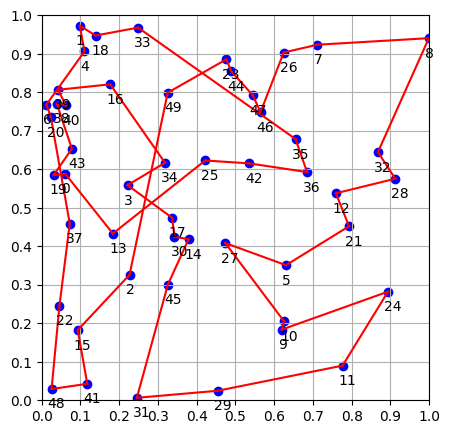

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

for i in range(len(cities)):
    plt.scatter(cities[i, 0], cities[i, 1], c="blue")
    plt.text(cities[i, 0] - 0.01, cities[i, 1] - 0.05, s=f"{i}")

for i in range(len(tsp.best_solution)-1):
    plt.plot(
        cities[[tsp.best_solution[i], tsp.best_solution[i+1]], :][:, 0],
        cities[[tsp.best_solution[i], tsp.best_solution[i+1]], :][:, 1],
        c="red"
    )
plt.plot(
        cities[[tsp.best_solution[i+1], tsp.best_solution[0]], :][:, 0],
        cities[[tsp.best_solution[i+1], tsp.best_solution[0]], :][:, 1],
        c="red"
    )

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.grid()